In [217]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图

In [218]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 溢出对策
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 初始化权重
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        print("out1:", a1)
        z1 = sigmoid(a1)
        
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        print("y:", y)
        
        return y
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        #z1.T 是z1矩阵的转置
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

In [219]:
def Norm(x, y):
    """求一个二维向量模长"""
    return math.pow(math.pow(x, 2) + math.pow(y, 2), 0.5)


def random_mat(data):
    cut = np.random.random_integers(len(data))
    l = []
    start = 0
    end = 0
    if cut - 50 > 0:
        start = cut - 50
        end = cut
        l = data[start:end]
    elif cut + 50 < len(data):
        end = cut + 50
        start = cut
        l = data[start:end]

    mat = []
    for i in range(len(l)):
        mat.append([l[i].x,l[i].y])

    return np.array(mat), start, end

def get_kind(data, start, end):
    t = data[start:end]
    kind = []
    for i in range(50):
        kind.append(t[i].kind)

    return np.array(kind)

def GetMaxIndex(v):
    max = v[0]
    index = 0
    for i in range(len(v)):
        if v[i] > max:
            max = v[i]
            index = i
    return index



### Point点对二维空间进行非线性二分类

In [220]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        if Norm(x, y) > 5:
            self.kind = [1, 0]
        else:
            self.kind = [0, 1]
            
    def __str__(self):
        return "Point({}, {}, {})".format(self.x, self.y, self.kind)

In [221]:
def CreateData(n):
    data = []
    x = np.random.randint(20,size=n)
    y = np.random.randint(20,size=n)
    for i in range(n):
        if i % 2 == 0:
            t = np.random.randint(2, size=1)[0]
            if t % 2 == 0:
                data.append(Point(int(-x[i]), int(-y[i])))
            else:
                data.append(Point(int(-x[i]), int(y[i])))
        else:
            t = np.random.randint(2, size=1)[0]
            if t % 2 == 0:
                data.append(Point(int(x[i]), int(-y[i])))
            else:
                data.append(Point(int(x[i]), int(y[i])))
    return data

In [222]:
data = CreateData(500)

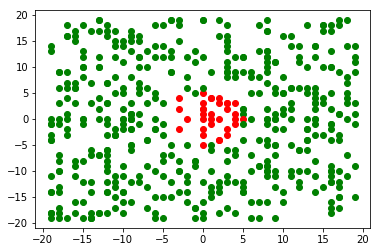

In [223]:
for i in data:
    if i.kind[0] == 1:
        plt.plot(i.x, i.y, 'o-g')
    else:
        plt.plot(i.x, i.y, 'o-r')
plt.show()

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 1000 + 1) instead
  import sys


out1: [-10.98168718   1.17781615  -4.01403142]
y: [ 0.96724144  0.03275856]
out1: [ -8.82492318 -16.2395257   11.25586757]
y: [ 0.99480091  0.00519909]
out1: [-16.67157139   7.95035663  -5.32976387]
y: [ 0.99581429  0.00418571]
out1: [  3.68697457  -6.08182659 -10.76789315]
y: [ 0.99464234  0.00535766]
out1: [-29.27247434  -0.30137802  14.88297068]
y: [  9.99903150e-01   9.68497653e-05]
out1: [ 17.42215648 -12.53037332 -17.43920592]
y: [ 0.99564294  0.00435706]
out1: [ -5.82583419   5.84106237 -13.56445596]
y: [ 0.99564142  0.00435858]
out1: [ -4.09130751 -12.1237137    2.65223059]
y: [ 0.9918457  0.0081543]
out1: [ -4.22589014   9.93676371 -19.16263236]
y: [ 0.99618688  0.00381312]
out1: [ -1.49166713  -0.66781633 -11.21938699]
y: [ 0.72163816  0.27836184]
out1: [ -4.13688493   8.03079926 -17.3516062 ]
y: [ 0.99622386  0.00377614]
out1: [ 14.62171697 -10.09708531 -17.19155907]
y: [ 0.99564445  0.00435555]
out1: [-20.07225862  13.64813933  -7.75738179]
y: [ 0.99565655  0.00434345]
out1

y: [  9.99699594e-01   3.00405555e-04]
out1: [  9.26506487  -0.87114615 -21.26510525]
y: [  9.99725019e-01   2.74981042e-04]
out1: [-14.95983342   0.06283705   0.88500428]
y: [  9.99390515e-01   6.09484916e-04]
out1: [  4.26443358   0.73093521 -18.09454676]
y: [  9.99991145e-01   8.85541374e-06]
out1: [-22.31587818  -5.43161584  13.35834046]
y: [ 0.99500177  0.00499823]
out1: [ -0.55818729  -1.47891234 -11.30193595]
y: [ 0.76943359  0.23056641]
out1: [-17.36082432  13.12081577  -9.81605481]
y: [ 0.99564165  0.00435835]
out1: [ -4.60255003 -10.76518347   1.78799198]
y: [ 0.98248482  0.01751518]
out1: [-6.49229841  0.93426502 -8.04882851]
y: [ 0.94276382  0.05723618]
out1: [-3.6028537  -3.40498745 -6.4854492 ]
y: [ 0.03270877  0.96729123]
out1: [-22.07165128  -1.07225271   8.78950056]
y: [  9.99521126e-01   4.78874231e-04]
out1: [ 14.28848486 -12.55048398 -14.43374534]
y: [ 0.99564293  0.00435707]
out1: [-2.33614176 -1.76268478 -9.32581188]
y: [ 0.14816179  0.85183821]
out1: [  1.3315610

out1: [-13.00386854  -3.46531942   2.53093255]
y: [ 0.99229946  0.00770054]
out1: [  8.22194076 -26.47989067   5.20114655]
y: [  9.99999536e-01   4.64328077e-07]
out1: [ -3.447632     2.86034013 -12.86531526]
y: [ 0.99457967  0.00542033]
out1: [  2.02081402 -18.34881996   3.02117548]
y: [  9.99997975e-01   2.02543439e-06]
out1: [-14.95983342   0.06283705   0.88500428]
y: [  9.99390515e-01   6.09484916e-04]
out1: [ -3.24683288 -11.02884525   0.75865547]
y: [ 0.93515544  0.06484456]
out1: [-20.1156864   -4.60040918  10.43542883]
y: [ 0.99525477  0.00474523]
out1: [  0.19728213   1.52192056 -15.00653723]
y: [  9.99863961e-01   1.36039446e-04]
out1: [-19.09320136  -7.31746963  12.16390604]
y: [ 0.99482627  0.00517373]
out1: [ -0.84584198 -24.08682397  11.45971456]
y: [  9.99687446e-01   3.12553886e-04]
out1: [ -0.580976     8.59834414 -21.30385434]
y: [  9.99848501e-01   1.51499202e-04]
out1: [ -1.0466411  -10.19763859  -2.16425616]
y: [ 0.36250094  0.63749906]
out1: [-17.64847901  -9.4870

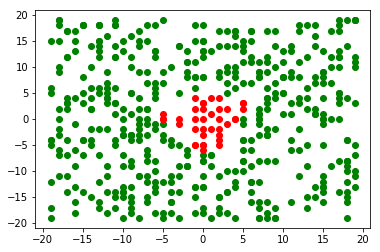

In [224]:
network = TwoLayerNet(input_size=2, hidden_size=3, output_size=2)
network.params = {'W1': np.array([[ 0.72907018, -0.11628131, -0.59031236],
                                   [ 0.31832248, -0.76271294,  0.41404479]]), 
                  'b1': np.array([-3.7256935 , -3.3605026 , -3.56923247]), 
                  'W2': np.array([[ 3.03088151, -3.01463272],
                                [ 2.90246557, -2.91045341],
                               [ 2.9320408 , -2.96879877]]), 
                  'b2': np.array([-1.03164879,  1.03164879])}
iters_num = 10000  # 适当设定循环的次数

batch_size = 100
learning_rate = 0.1

data = CreateData(1000)

for i in range(iters_num):
    x_batch, start, end = random_mat(data)
    t_batch = get_kind(data, start, end)

    grad = network.gradient(x_batch, t_batch)

    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]


testData = CreateData(500)
for i in testData:
    if GetMaxIndex(network.predict(np.array([i.x,i.y]))) == 0:
        plt.plot(i.x, i.y, 'o-g')
    else:
        plt.plot(i.x, i.y, 'o-r')
plt.show()

In [208]:
params = network.params

### 空间分类

```text
n维空间可分类数 = 2的n次方

比如:
二维空间的x,y坐标轴把空间分为四个象限，三维空间x,y,z坐标轴把空间分为八个象限

```

### 多层神经网络处理多分类的原理：
```text
   二维空间最多只能处理线性四分类问题，如果用二维空间来分类非线性三分类问题是不可以的，原因是找不到这三个非线性类别的特征向量，
我们可以把二维数据升维投影到三维空间，在三维空间当中我们就可能找到三个类别特征向量来进行三分类，如果升维到三维空间效果不行，则可以向更高维度的空间投影，最后降维投影到n分类维度空间得到分类结果
```

In [237]:
test = CreateData(500)
t = []
for i in test:
    t.append([i.x, i.y])

#### 第一层隐含层把二维数据升维到三维

In [238]:
three = np.array(t).dot(params['W1']) + params['b1']

green: [-17.69118267  -3.49978981  10.06410415]
green: [ 10.64974353  -9.303862   -16.68475254]
green: [-11.70938986   2.42780957  -3.26696255]
green: [ -5.73995273   2.57495462 -10.37271689]
green: [-18.89495464  -8.1535823   16.4655049 ]
green: [ -2.14717034   7.86565055 -20.23895061]
green: [-12.92551752  -8.00643725   9.35975057]
green: [ -0.96810974   0.95853435 -14.18972665]
green: [-9.04260336 -6.61019075  3.34031497]
green: [ 10.66827706  -0.63318048 -26.02272108]
green: [-10.83281671  -6.36531154   5.16077565]
green: [  2.02587559   5.36744763 -22.41158809]
green: [ -3.69667467 -18.90573705  10.32955765]
green: [  9.76699254  -3.40096805 -21.99983456]
green: [-14.9996848   -0.97688145   4.22075694]
green: [ -6.0300845    6.46940405 -14.21951501]
red: [-5.45599881 -4.20972199 -3.41326258]
green: [  9.77934823   2.37948629 -28.22514692]
green: [-12.3328983  -10.01488177  10.82803446]
green: [ -0.6965115  -11.6065966   -1.00495997]
green: [-10.55504063 -16.04021532  15.23288614]


C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


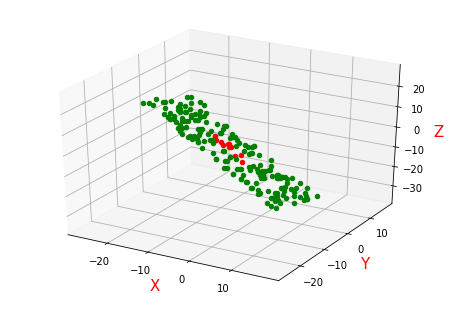

In [245]:
fig = plt.figure()
ax = Axes3D(fig)
index = 0
for i in three:
    if test[index].kind[0] == 1:
        ax.scatter(i[0], i[1], i[2], c='g')
        print("green:",i)
    else:
        ax.scatter(i[0], i[1], i[2], c='r')
        print("red:",i)
    index += 1


# ax.scatter(x2, y2, z2, c='g', label='随机点')
 
 
# 绘制图例
ax.legend(loc='best')
 
 
# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel('Z', fontdict={'size': 15, 'color': 'red'})
ax.set_ylabel('Y', fontdict={'size': 15, 'color': 'red'})
ax.set_xlabel('X', fontdict={'size': 15, 'color': 'red'})
 
 
# 展示
plt.show()